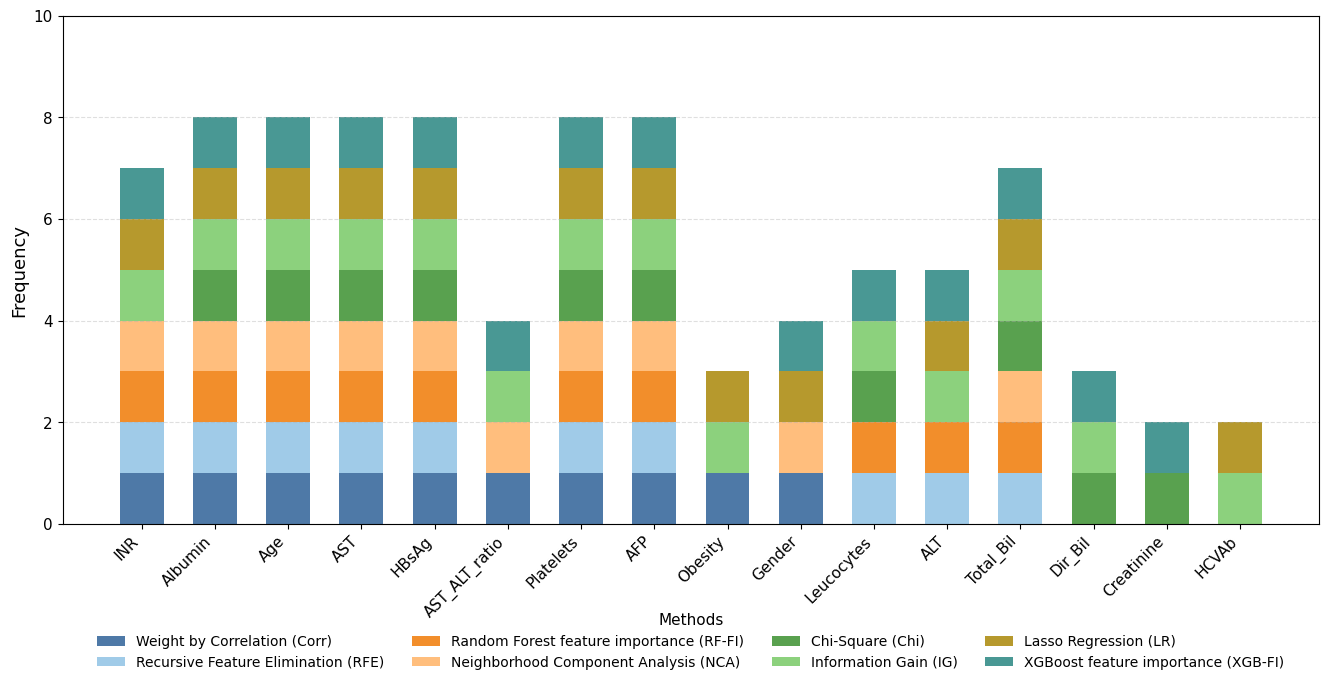

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Phương pháp
methods = ['Weight by Correlation (Corr)', 'Recursive Feature Elimination (RFE)', 'Random Forest feature importance (RF-FI)', 'Neighborhood Component Analysis (NCA)', 'Chi-Square (Chi)', 'Information Gain (IG)', 'Lasso Regression (LR)', 'XGBoost feature importance (XGB-FI)']

# Đặc trưng
features = [
    'INR', 'Albumin', 'Age', 'AST', 'HBsAg', 'AST_ALT_ratio', 'Platelets', 'AFP',
    'Obesity', 'Gender', 'Leucocytes', 'ALT', 'Total_Bil', 'Dir_Bil', 'Creatinine', 'HCVAb'
]

# Đặc trưng được chọn bởi từng phương pháp
method_features = {
    'Weight by Correlation (Corr)': ['INR', 'Albumin', 'HBsAg', 'Age', 'Platelets', 'Obesity', 'AST_ALT_ratio', 'AFP', 'AST', 'Gender'],
    'Recursive Feature Elimination (RFE)': ['Age', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT', 'Total_Bil', 'Albumin', 'HBsAg', 'AFP'],
    'Random Forest feature importance (RF-FI)': ['AFP', 'INR', 'Platelets', 'AST', 'Albumin', 'Age',   'HBsAg', 'Total_Bil',  'Leucocytes', 'ALT'],
    'Neighborhood Component Analysis (NCA)': ['INR', 'AFP', 'AST', 'Platelets', 'Albumin', 'Age', 'AST_ALT_ratio', 'HBsAg', 'Gender', 'Total_Bil'],
    'Chi-Square (Chi)': ['Age', 'Leucocytes', 'Platelets', 'AST', 'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'AFP'],
    'Information Gain (IG)': ['AFP', 'INR', 'AST', 'Platelets', 'Total_Bil', 'Albumin', 'HBsAg', 'Dir_Bil', 'Age', 'Obesity', 'Leucocytes', 'ALT', 'HCVAb', 'AST_ALT_ratio'],
    'Lasso Regression (LR)': ['Age', 'Gender', 'Platelets', 'INR', 'AST', 'ALT', 'Total_Bil', 'Albumin', 'HBsAg', 'HCVAb', 'AFP', 'Obesity'],
    'XGBoost feature importance (XGB-FI)': ['AFP', 'INR', 'AST', 'Platelets', 'Total_Bil', 'Albumin', 'HBsAg', 'Dir_Bil', 'Age', 'Creatinine', 'Leucocytes', 'ALT', 'Gender', 'AST_ALT_ratio']
}

# Ma trận dữ liệu
data = np.zeros((len(features), len(methods)))
for j, m in enumerate(methods):
    for f in method_features[m]:
        if f in features:
            i = features.index(f)
            data[i, j] += 1

x = np.arange(len(features))
bottom = np.zeros(len(features))

colors = [
    '#4E79A7', '#A0CBE8', '#F28E2B', '#FFBE7D',
    '#59A14F', '#8CD17D', '#B6992D', '#499894'
]

# Vẽ stacked bar chart (với cột mảnh hơn)
plt.figure(figsize=(14, 7))
bar_width = 0.6  # 🔹 giảm độ rộng cột
for j, m in enumerate(methods):
    plt.bar(x, data[:, j], bottom=bottom, label=m, color=colors[j], width=bar_width)
    bottom += data[:, j]

# Hiển thị
plt.xticks(x, features, rotation=45, ha='right', fontsize=11, fontstyle='normal')  # 🔹 chữ đứng
plt.yticks(fontsize=11)
plt.ylabel('Frequency', fontsize=13)

plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Legend bên dưới
plt.legend(
    title='Methods',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    fontsize=10,
    title_fontsize=11,
    frameon=False
)

plt.tight_layout()
plt.show()


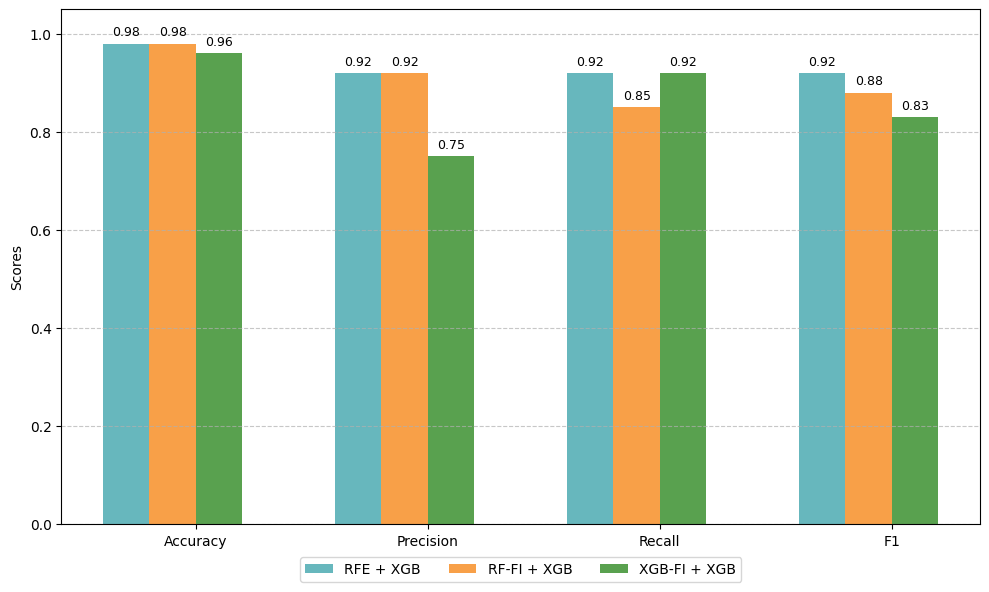

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
models = ['RFE + XGB', 'RF-FI + XGB', 'XGB-FI + XGB']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = np.array([
    [0.98, 0.92, 0.92, 0.92],
    [0.98, 0.92, 0.85, 0.88],
    [0.96, 0.75, 0.92, 0.83]
])

# Thiết lập biểu đồ
x = np.arange(len(metrics))
width = 0.2

colors = ["#67b7bd",  
          "#F8A048",  
          '#59A14F']  

fig, ax = plt.subplots(figsize=(10,6))


for i in range(len(models)):
    bars = ax.bar(x + i*width, values[i], width, label=models[i], color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Scores')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.show()

